## Klasyfikacja z użyciem sztucznych neuronów

W ramach wstępu do tematyki sieci neuronowych przedstawiony zostanie pojedynczy sztuczny neuron, a następnie pojedyncza warstwa sztucznych neuronów, w zadaniu klasyfikacji do liniowo separowalnych klas.

### Klasyfikacja

Klasyfikacja jest bardzo istotnym zadaniem uczenia maszynowego, polegającym na automatycznym przypisywaniu (klasyfikowaniu) jakichś danych (liczbowych, tekstowych, wizualnych) do jednej z ustalonych kategorii, które najczęściej znamy i rozumiemy:


*   Zdjęcie płuca - chore / zdrowe
*   Treść maila - spam / nie spam
*   Pomiary odcisku łapy - niedźwiedź / wilk / sarna / żubr
*   Odwiedzone strony internetowe - wykształcenie podstawowe / średnie / wyższe



### Tło biologiczne

W bardzo dużym (i nie całkiem poprawnym, bo biologia jest znacznie bardziej skomplikowana) uproszczeniu, biologiczny neuron posiada wiele "wejść" (dendrytów) i jedno "wyjście" (akson). Sygnały przychodzące dendrytami mogą być pobudzające lub hamujące. Gdy pobudzenie jest odpowiednio duże, neuron wysyła sygnał w dół aksonu, "komunikując się" w ten sposób z innymi neuronami.

### Perceptron

Najprostszym modelem sztucznego neuronu jest perceptron, który agreguje wejścia $x_1, x_2, ... , x_n$ i na podstawie funkcji aktywacji przetwarza je na wyjście $y$, co można opisać wzorem:

$y = f(\sum_i (x_iw_i) + b)$

Najczęściej używaną funkcją aktywacji we wczesnym perceptronie była prosta funkcja:

$f(x)=
\begin{cases}
0, x < 0 \\
1, x \geq 0 
\end{cases}$

symulująca zachowanie faktycznych neuronów (kiedy pobudzenie przekracza próg, wysyłają sygnał)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Schemat perceptronu został zaprezentowany poniżej:

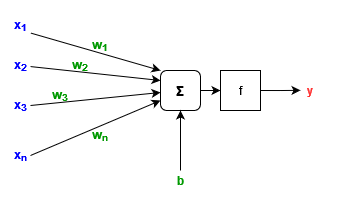

Można zauważyć, że pojedynczy perceptron reprezentuje funkcję, która jest warta 1, kiedy $\sum_i (x_iw_i) + b \geq 0$. 

Przypomnienie z algebry: dla dwuwymiarowej przestrzeni z osiami opisanymi $x_1$, $x_2$ wzór $w_1x_1+w_2x_2+b = 0$ opisuje prostą, a $w_1x_1+w_2x_2+b \geq 0$ półpłaszczyznę. Dla wyższych wymiarów będzie to jakaś hiperpłaszczyzna separująca $R^n$ na dwie części.

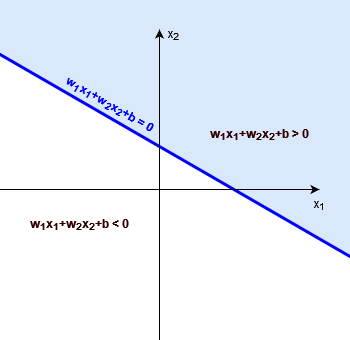

Żeby perceptron mógł skutecznie dokonać klasyfikacji, klasy muszą być **liniowo separowalne!**

### Jak znaleźć wagi?

* Mamy zbiór punktów, na których "uczymy" perceptron (znamy ich klasę)
* Losujemy początkowe wagi
* Podajemy punkt, sprawdzamy, czy klasa przewidziana przez perceptron zgadza się z faktyczną klasą - na podstawie błędu zmieniamy wagi: $w_i^{k+1} = w_i^k + \Delta w_i^k$ (jak znaleźć $\Delta w_i^k$? - **odpowiedzi na wykładach**)
* Proces musimy powtórzyć odpowiednio dużo razy dla wszystkich danych uczących

Proces został przedstawiony poniżej:

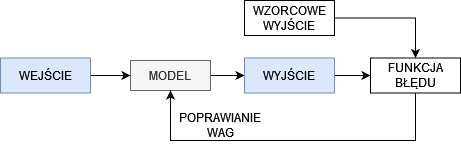

Jest to tzw. uczenie z nauczycielem, w którym poprawiamy model na podstawie różnicy między wyjściem a znanym, wzorcowym wyjściem. Wymaga to, żebyśmy znali poprawne etykiety klas, przynajmniej dla jakiegoś niewielkiego zbioru, który wykorzystujemy do uczenia i testowania sieci. Podziałem zbioru na klasy, kiedy poprawne etykiety nie są znane, zajmuje się klasteryzacja.

### Przykład perceptronu



In [ ]:
from sklearn.linear_model import Perceptron
# dokumentacja perceptronu: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

# przygotowujemy wzorcowe dane uczące. X to współrzędne, y to klasa, do której należą
X = [[0.,0.],[1.,0.],[-1.,0],[-1.,-1],[1.,1]]
y = [0,1,0,0,1]

# przygotowujemy perceptron.
neuron = Perceptron(tol=1e-3, max_iter = 20)

# uczymy neuron przez wskazaną liczbę epok lub do zatrzymania się uczenia 
neuron.fit(X, y)

# możemy sprawdzić jak udane było uczenie:
neuron.score(X, y)

1.0

In [ ]:
# Zobaczmy, jak wyglądają wagi neuronu:
neuron.coef_

array([[2., 1.]])

In [ ]:
# Zobaczmy, jak wygląda bias neuronu:
neuron.intercept_

array([-1.])

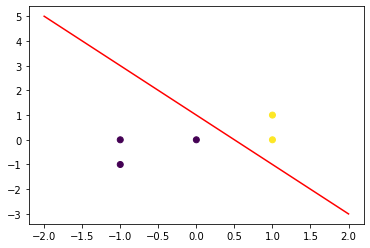

In [ ]:
# Spróbujmy narysować funkcję, jaką przybliża neuron i jak wyglądają dane uczące:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-2,2,100)
# wzór x2 = a*x1+c wymaga trochę prostych przekształceń algebraicznych z postaci w1x1+w2x2+b=0
x2 = -(1./neuron.coef_[0][1])*(neuron.coef_[0][0]*x1+neuron.intercept_[0])
plt.plot(x1, x2, '-r')

# od tego momentu dla wygody i uproszczenia zapisu stosowane będą arraye pakietu numpy, które pozwalają na łatwiejszą pracę z wielowymiarowymi danymi
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=y)
plt.show()

### Próba ucząca a próba testująca

Zazwyczaj nauczony model ma działać na innych danych niż te, które posłużyły do jego uczenia - chcemy, żeby model był w stanie poradzić sobie poza samym środowiskiem uczącym! Zobaczmy, jak nasz model poradzi sobie dla zestawu punktów testujących.

In [ ]:
X_test = np.array([[-0.8, 3.6],[0.,-1],[-0.2,-1],[0.4,-4],[1.5,5],[2.,3.],[1.2, -3.5],[-0.5,-3]])
y_test = [0,0,0,1,1,1,1,0]

# sprawdźmy ilość poprawnych trafień, tym razem dla zbioru testującego
neuron.score(X_test,y_test)

0.625

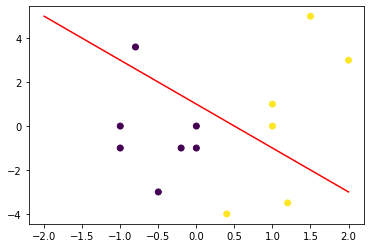

In [ ]:
# Spróbujmy narysować zbiór uczący razem z testującym

plt.plot(x1, x2, '-r')
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=y)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

**Wniosek**: podział zbioru na dane uczące i testujące jest bardzo istotny!

### Macierz pomyłek

Sama skalarna wartość trafności sieci nie zawsze niesie wystarczające informacje o jakości klasyfikacji, czasem chcemy dowiedzieć się, do których klas częściej model przypisuje poprawnie (lub nie) punkty. Macierz pomyłek ma postać:

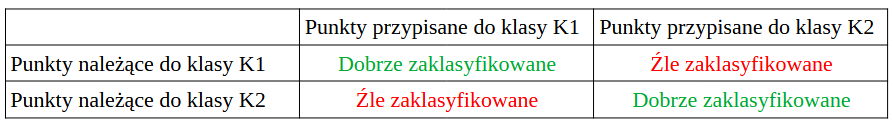

In [ ]:
# zobaczmy macierz pomyłek dla naszego pojedynczego neuronu
from sklearn.metrics import confusion_matrix

y_predicted = neuron.predict(X_test)
confusion_matrix_model = confusion_matrix(y_test, y_predicted)
confusion_matrix_model

array([[3, 1],
       [2, 2]])

### Warstwa perceptronów

W wielu praktycznych zastosowaniach klasyfikujemy do większej liczby klas niż dwie. Możemy osiągnąć to za pomocą warstwy niezależnych od siebie perceptronów. Kombinacja wyjść perceptronów jest numerem klasy (np. w naturalnym systemie binarnym). Przykładowy podział przestrzeni za pomocą dwóch neuronów został przedstawiony na poniższym schemacie. Zakładamy, że pierwszy perceptron ma wagi w1, w2 i bias b, a drugi perceptron ma wagi v1, v2 i bias c.

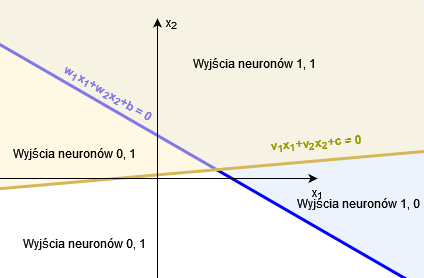

In [ ]:
# przykład klasyfikacji do czterech klas za pomocą dwóch perceptronów

# tym razem skorzystamy z pseudolosowych rozkładów punktów.
X2 = np.concatenate((np.random.normal([-2,-2.5],[1,1],[200,2]), np.random.normal([-1.5,2],[1,1],[200,2]), np.random.normal([2.5,-1.8],[1,1],[200,2]), np.random.normal([3.2,2.0],[1,1],[200,2])))
y2 = np.concatenate((np.array([[0,0]]*200),np.array([[0,1]]*200),np.array([[1,0]]*200),np.array([[1,1]]*200)))

# na razie spróbujmy zrobić klasyfikację "ręcznie", tj. biorąc dwa niezależne neurony. Wszystkie biblioteki są w stanie zrobić to za nas, zrobimy to jednak na cele przykładu.
neuron_1 = Perceptron(tol=1e-3, max_iter = 20)
neuron_2 = Perceptron(tol=1e-3, max_iter = 20)

neuron_1.fit(X2, y2[:,0])
neuron_2.fit(X2, y2[:,1])

neuron_1.predict(X2)

y2_predict = np.vstack((neuron_1.predict(X2),neuron_2.predict(X2))).T

# ze względu na to, że podstawowa funkcja confusion_matrix nie obsługuje etykiet klas podanych jako arraye, zamieńmy je na liczby:
y2_labels = [2*i[0]+i[1] for i in y2]
y2_predict_labels = [2*i[0]+i[1] for i in y2_predict]

confusion_matrix_2 = confusion_matrix(y2_labels, y2_predict_labels)
confusion_matrix_2

array([[198,   1,   1,   0],
       [  3, 193,   0,   4],
       [  2,   0, 185,  13],
       [  0,   2,   2, 196]])

In [ ]:
# zliczając elementy z diagonali możemy zobaczyć ilość poprawnych trafień:
accuracy = (confusion_matrix_2[0,0] + confusion_matrix_2[1,1] + confusion_matrix_2[2,2] + confusion_matrix_2[3,3]) / np.sum(confusion_matrix_2)
accuracy

0.965

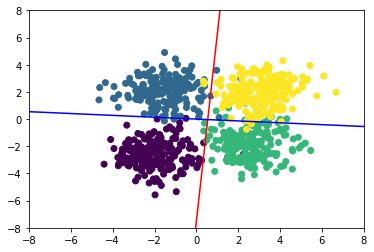

In [ ]:
# wreszcie spróbujmy narysować zbiory i sposób, w jaki neurony podzieliły przestrzeń

x1 = np.linspace(-8,8,200)
neuron_1_x2 = -(1./neuron_1.coef_[0][1])*(neuron_1.coef_[0][0]*x1+neuron_1.intercept_[0])
neuron_2_x2 = -(1./neuron_2.coef_[0][1])*(neuron_2.coef_[0][0]*x1+neuron_2.intercept_[0])

plt.plot(x1, neuron_1_x2, '-r')
plt.plot(x1, neuron_2_x2, '-b')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.scatter(X2[:,0], X2[:,1], c=y2_labels)
plt.show()

Na szczęście niemal wszystkie modele wbudowane w biblioteki i moduły różnych języków pozwalają na bardziej elastyczną pracę na klasyfikacji do wielu klas. Przedstawione teraz zostanie prostsze wykorzystanie klasy Perceptron dla tych samych danych.

In [ ]:
perceptron_layer = Perceptron(tol=1e-3, max_iter = 20)

# przypomnienie, że y2 labels zawiera wartości 0,1,2,3 zamiast 00, 01, 10, 11.
perceptron_layer.fit(X2, y2_labels)
perceptron_layer.score(X2, y2_labels)

0.9375

In [ ]:
# zobaczmy wagi modelu. Zobaczymy, że jest ich odpowiednio więcej, bo model musiał stworzyć więcej neuronów:
perceptron_layer.coef_

array([[ -5.5113803 ,  -7.69469894],
       [ -5.85344767,   6.36739803],
       [  7.90025002, -12.58251143],
       [  5.80979016,   8.81358575]])

In [ ]:
# zobaczmy biasy modelu:
perceptron_layer.intercept_

array([-16., -12., -21., -25.])

Widzimy, że Perceptron z modułu Sklearn stworzył aż cztery neurony. Wynika to z różnic w kodowaniu rozwiązania. Możemy zobaczyć, jak wygląda podział przestrzeni wygenerowany przez klasę.

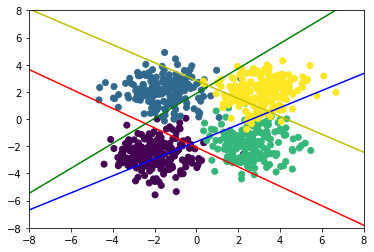

In [ ]:
x1 = np.linspace(-8,8,200)
separation_1 = -(1./perceptron_layer.coef_[0][1])*(perceptron_layer.coef_[0][0]*x1+perceptron_layer.intercept_[0])
separation_2 = -(1./perceptron_layer.coef_[1][1])*(perceptron_layer.coef_[1][0]*x1+perceptron_layer.intercept_[1])
separation_3 = -(1./perceptron_layer.coef_[2][1])*(perceptron_layer.coef_[2][0]*x1+perceptron_layer.intercept_[2])
separation_4 = -(1./perceptron_layer.coef_[3][1])*(perceptron_layer.coef_[3][0]*x1+perceptron_layer.intercept_[3])

plt.plot(x1, separation_1, '-r')
plt.plot(x1, separation_2, '-g')
plt.plot(x1, separation_3, '-b')
plt.plot(x1, separation_4, '-y')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.scatter(X2[:,0], X2[:,1], c=y2_labels)
plt.show()

Można zauważyć, że większa liczba neuronów dokonuje separacji przestrzeni na więcej części, co może jednak wymagać dłuższego uczenia i przyczynia się do zwiększenia poziomu skomplikowania modelu. W wypadku liczby zbiorów tak małej jak cztery, w dwuwymiarowej przestrzeni na szczęście nie musimy się tym (raczej) przejmować. Warto też zauważyć, że nie wszystkie części przestrzeni są wykorzystane, z czym będziemy mieć do czynienia właściwie zawsze (chyba, że ilość naszych klas jest potęgą liczby 2).

# Zadania do samodzielnego wykonania

1)

Proszę wygenerować dane przypisane do dwóch klas K1 i K2, pochodzące z rozkładów normalnych N([0,-1],1) i N([1,1],1). Próba testująca powinna zawierać 200 punktów. Proszę sprawdzić skuteczność klasyfikacji dla 5, 10, 20 oraz 100 punktów uczących. W każdym wypadku proszę ustalić wzór hiperpłaszczyzny (w naszym wypadku - prostej) oddzielającej klasy, a następnie pokazać ją na wykresie razem z danymi.

2)

Analiza próbek benzyny wykazała że może ona być przypisana do dwóch klas czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla pięciokrotnego uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.

3)

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris( ). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji 80%/20%. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

4)

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

5)

Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.


Polecamy skorzystać z dokumentacji i materiałów:

Podpinanie dysku google do notatnika (np. na cele pliku fuel.txt):
https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

Pakiet Sklearn: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Tutorial pakietu numpy: https://numpy.org/doc/stable/user/quickstart.html

Wykorzystane funkcje pakietu numpy: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html, https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

Dla zainteresowanych:

Zbiór danych irysów: https://en.wikipedia.org/wiki/Iris_flower_data_set

#Wykonanie zadan

Zad 1

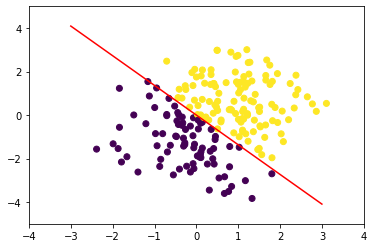

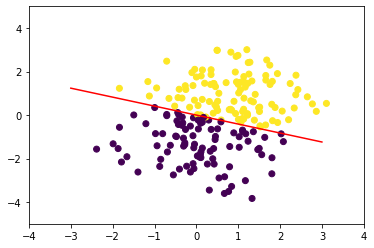

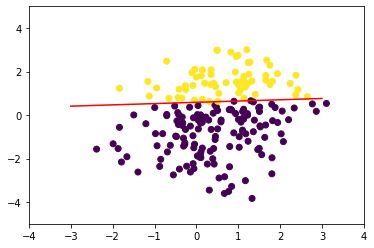

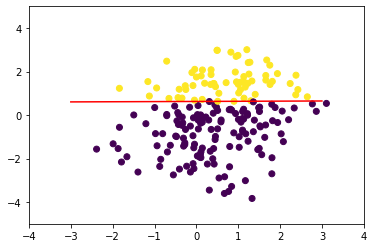

In [ ]:
#Tworzenie próby testującej
X200 = np.concatenate((np.random.normal([0.0,-1.0],[1,1],[100,2]), np.random.normal([1.0,1.0],[1,1],[100,2])))
Y200 = np.concatenate((np.array([[0]]*100),np.array([[1]]*100)))

#Tworzenie prób uczących
X5 = np.concatenate((np.random.normal([0.0,-1.0],[1],[3,2]), np.random.normal([1.0,1.0],[1],[2,2])))
Y5 = np.concatenate((np.zeros(3),np.ones(2)))

X10 = np.concatenate((np.random.normal([0.0,-1.0],[1],[5,2]), np.random.normal([1.0,1.0],[1],[5,2])))
Y10 = np.concatenate((np.zeros(5),np.ones(5)))

X20 = np.concatenate((np.random.normal([0.0,-1.0],[1],[10,2]), np.random.normal([1.0,1.0],[1],[10,2])))
Y20 = np.concatenate((np.zeros(10),np.ones(10)))

X100 = np.concatenate((np.random.normal([0.0,-1.0],[1],[50,2]), np.random.normal([1.0,1.0],[1],[50,2])))
Y100 = np.concatenate((np.zeros(50),np.ones(50)))

#Tworzenie perceptronów i trenowanie ich wg polecenia
##5 punktów uczących
perceptron_layer_5 = Perceptron(tol=1e-3, max_iter = 20)
perceptron_layer_5.fit(X5, Y5)
perceptron_layer_5.score(X200, Y200)

x1 = np.linspace(-3,3,200)
separation_1 = -(1./perceptron_layer_5.coef_[0][1])*(perceptron_layer_5.coef_[0][0]*x1+perceptron_layer_5.intercept_[0])

plt.plot(x1, separation_1, '-r')
plt.xlim(-4,4)
plt.ylim(-5,5)
y_predicted = perceptron_layer_5.predict(X200)
plt.scatter(X200[:,0], X200[:,1], c=y_predicted)
plt.show()

##10 punktów uczących
perceptron_layer_10 = Perceptron(tol=1e-3, max_iter = 20)
perceptron_layer_10.fit(X10, Y10)
perceptron_layer_10.score(X200, Y200)

x1 = np.linspace(-3,3,200)
separation_1 = -(1./perceptron_layer_10.coef_[0][1])*(perceptron_layer_10.coef_[0][0]*x1+perceptron_layer_10.intercept_[0])

plt.plot(x1, separation_1, '-r')
plt.xlim(-4,4)
plt.ylim(-5,5)
y_predicted = perceptron_layer_10.predict(X200)
plt.scatter(X200[:,0], X200[:,1], c=y_predicted)
plt.show()

##20 punktów uczących
perceptron_layer_20 = Perceptron(tol=1e-3, max_iter = 20)
perceptron_layer_20.fit(X20, Y20)
perceptron_layer_20.score(X200, Y200)

x1 = np.linspace(-3,3,200)
separation_1 = -(1./perceptron_layer_20.coef_[0][1])*(perceptron_layer_20.coef_[0][0]*x1+perceptron_layer_20.intercept_[0])

plt.plot(x1, separation_1, '-r')
plt.xlim(-4,4)
plt.ylim(-5,5)
y_predicted = perceptron_layer_20.predict(X200)
plt.scatter(X200[:,0], X200[:,1], c=y_predicted)
plt.show()

##100 punktów uczących
perceptron_layer_100 = Perceptron(tol=1e-3, max_iter = 20)
perceptron_layer_100.fit(X100, Y100)
perceptron_layer_100.score(X100, Y100)

x1 = np.linspace(-3,3,200)
separation_1 = -(1./perceptron_layer_100.coef_[0][1])*(perceptron_layer_100.coef_[0][0]*x1+perceptron_layer_100.intercept_[0])

plt.plot(x1, separation_1, '-r')
plt.xlim(-4,4)
plt.ylim(-5,5)
y_predicted = perceptron_layer_100.predict(X200)
plt.scatter(X200[:,0], X200[:,1], c=y_predicted)
plt.show()

Zad 2

In [ ]:
#Importowanie danych z pliku
from google.colab import drive
drive.mount('/content/drive')
data = np.loadtxt('/content/drive/MyDrive/fuel.txt')

#Przygotowanie danych dla sieci
X = []
Y = []
for line in data:
  X.append([line[0], line[1], line[2]])
  Y.append(line[3])

#Tworzenie i trenowanie sieci neuronowej
neuron_5 = Perceptron(tol=1e-3, max_iter=5)
neuron = Perceptron(tol=1e-3) 

neuron_5.fit(X, Y)
neuron.fit(X, Y)

print("Dla 5 epok: ", neuron_5.score(X, Y))
print("Dla wszystkich możliwych epok: ", neuron.score(X, Y))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dla 5 epok:  0.5
Dla wszystkich możliwych epok:  0.5333333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Zad 3

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix

iris_data, iris_labels = load_iris(return_X_y=True)
train_data, test_data, train_labels, test_labels = train_test_split(iris_data, iris_labels, test_size = 0.2)

perceptron_layer = Perceptron(tol=1e-3, max_iter = 20)
perceptron_layer.fit(train_data, train_labels)
perceptron_layer.score(test_data, test_labels)
predicted_labels = perceptron_layer.predict(test_data)
confusion_matrix = confusion_matrix(test_labels, predicted_labels)
print(confusion_matrix)

[[12  0  0]
 [ 1  8  0]
 [ 0  1  8]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Uzyskano macierze pomyłek:  
```
[ 9  0  0]   [13  0  0]   [10  0  0]   [12  0  0]   [14  1  0]
[ 1  0  9]   [ 4  0  4]   [ 0  0  7]   [ 0  9  0]   [ 0  5  0]
[ 0  0 11]   [ 0  0  9]   [ 0  0 13]   [ 0  6  3]   [ 0  1  9]
```
Macierz pomyłek jest sposobem wizualizacji dokładności klasyfikacji w zadaniach uczenia maszynowego. Każdy wiersz w macierzy reprezentuje rzeczywistą klasę, a każda kolumna reprezentuje klasę przewidywaną. W rozpatrywanym przykładzie błędy pojawiają się najczęściej w drugim wierszu oraz w drugiej kolumnie. Można na tej podstawie wyciągnąć wniosek, że używane dane nie pozwalają na poprawne odseparowanie obiektó klasy 2 od obiektów pozostąłych klas (być może klasy nie są wystarczająco dobrze separowalne liniowo).

W przypadku datasetu Iris, dwie z trzech par klas (Setosa vs. Versicolor i Versicolor vs. Virginica) są liniowo separowalne, ale trzecia para (Setosa vs. Virginica) nie jest liniowo separowalna. Oznacza to, że pojedynczy perceptron lub pojedyncza warstwa perceptronów nie będzie w stanie osiągnąć 100% trafności klasyfikacji dla całego zbioru danych, ponieważ nie będzie on w stanie dokładnie określić różnicy pomiędzy liniowo nieseparowalnymi klasami.

Zad 4

In [ ]:
iris_data, iris_labels = load_iris(return_X_y=True)
train_data_2, test_data_2, train_labels_2, test_labels_2 = train_test_split(iris_data, iris_labels, test_size = 0.2)
perceptron_layer_2 = Perceptron(tol=1e-3, max_iter = 30)
perceptron_layer_2.fit(train_data_2, train_labels_2)
print("Precyzja dla podziału 80%/20%", perceptron_layer_2.score(test_data_2, test_labels_2))

train_data_5, test_data_5, train_labels_5, test_labels_5 = train_test_split(iris_data, iris_labels, test_size = 0.5)
perceptron_layer_5 = Perceptron(tol=1e-3, max_iter = 30)
perceptron_layer_5.fit(train_data_5, train_labels_5)
print("Precyzja dla podziału 50%/50%", perceptron_layer_5.score(test_data_5, test_labels_5))

train_data_8, test_data_8, train_labels_8, test_labels_8 = train_test_split(iris_data, iris_labels, test_size = 0.8)
perceptron_layer_8 = Perceptron(tol=1e-3, max_iter = 30)
perceptron_layer_8.fit(train_data_8, train_labels_8)
print("Precyzja dla podziału 20%/80%", perceptron_layer_8.score(test_data_8, test_labels_8))

Precyzja dla podziału 80%/20% 0.9333333333333333
Precyzja dla podziału 50%/50% 0.6933333333333334
Precyzja dla podziału 20%/80% 0.65


W powyższym kodzie zastosowano losowy podział na dane uczące i sprawdzające zmieniając stosunek ilości danych uczących do testujących. Można zauważyć, że im większy jest zbiór danych uczących, tym dokładniejszą klasyfikację otrzymuje się. Możliwe są też inne sposoby dzielenia danych na uczące i sprawdzające:  
1. Dzielenie z zachowaniem proporcji klas (np 80% obiektów każdej klasy trafi do danych uczących) - jest to sposób szczególnie warty zastosowania, gdy zestaw danych zawiera różną liczbę obiektów poszczególnych klas (np. jedna klasa jest znacznie mniej/bardziej liczna)
2. Dzielenie sekwencyjne (czyli pierwsze X obiektów trafia do danych uczących) - jest to sposób, który pozwala uniknąć problemów związanych z wyborem losowym (np. przefitowanie jedną klasą lub niedostateczna ilość obiektów danej klasy w zbiorze uczącym). Żeby działała ona jednak poprawnie zbiór danych musi zostać wcześniej odpowiednio przygotowany (należy unikać sytuacji, gdy do danych uczących trafiają obiekty jedynie 1 klasy, lub obiekty jakiejś klasy nie trafiają do nich w ogóle)

Zad 5

In [ ]:
iris_data, iris_labels = load_iris(return_X_y=True)
train_data, test_data, train_labels, test_labels = train_test_split(iris_data, iris_labels, test_size=0.2)

for i in range(1, 21):
    clf = Perceptron(max_iter=i, tol=1e-10)
    clf.fit(train_data, train_labels)
    score = clf.score(test_data, test_labels)
    print(f"max_iter: {i}, accuracy: {score}")


max_iter: 1, accuracy: 0.6333333333333333
max_iter: 2, accuracy: 0.7333333333333333
max_iter: 3, accuracy: 0.9666666666666667
max_iter: 4, accuracy: 0.8333333333333334
max_iter: 5, accuracy: 0.6333333333333333
max_iter: 6, accuracy: 0.5333333333333333
max_iter: 7, accuracy: 0.5666666666666667
max_iter: 8, accuracy: 0.6333333333333333
max_iter: 9, accuracy: 0.9333333333333333
max_iter: 10, accuracy: 0.9333333333333333
max_iter: 11, accuracy: 0.7333333333333333
max_iter: 12, accuracy: 0.7333333333333333
max_iter: 13, accuracy: 0.7333333333333333
max_iter: 14, accuracy: 0.7333333333333333
max_iter: 15, accuracy: 0.7333333333333333
max_iter: 16, accuracy: 0.7333333333333333
max_iter: 17, accuracy: 0.7333333333333333
max_iter: 18, accuracy: 0.7333333333333333
max_iter: 19, accuracy: 0.7333333333333333
max_iter: 20, accuracy: 0.7333333333333333


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_grad

Ilość epok jest ważnym parametrem przy tworzeniu sieci neuronowych. Epoką nazywamy przejście przez wszystkie dane ze zbioru uczącego. W każdym przejściu algorytmy trenujące sieci próbują tak zmienić współczynniki funkcji klasyfikacji, aby uzyskać jak najmniejszą wartość funkcji błędu. Z tego powodu zwiększanie "w nieskończoność" ilości epok jest bezceowe - gdy sieć wpadnie w minimum lokalne funkcji błędu dalsze epoki nie zwiększą dokładności klasyfikacji. Jak można zauważyć dla kolejnych uruchomień algorytmu dokładność klasyfikacji potrafi spaść wraz ze zwiększeniem liczby iteracji. Zjawisko to nazywa sięoverfittingiem - sieć zbytnio dopasowuje się do danych uczących i nie potrafi uogólnić wyniku na nlowe dane. Nie można z góry orzec jaka ilość epok będzie odpowiednia dla danego zbioru danych - należy sprawdzać to eksperymentalnie.